In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [8]:
df['age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: age, dtype: float64

In [27]:
# Calculating IQR
Q1 =np.percentile(df['age'], 25)
Q3 =np.percentile(df['age'], 75)



In [11]:
IQR = Q3 - Q1

In [12]:
# Defining the outlier criteria (1.5 times the IQR)
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [15]:
# Identifying outliers
outliers = (df['age'] < lower_bound) | ( df['age'] > upper_bound)

Text(0.5, 1.0, 'Original Data with Outliers')

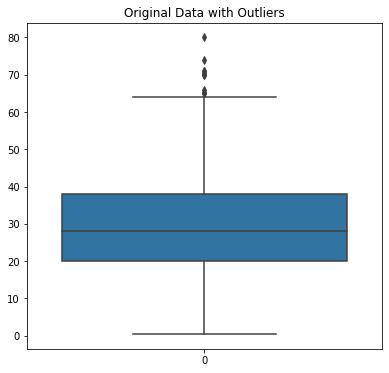

In [16]:
# Plotting the original data with outliers
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=df['age'])
plt.title('Original Data with Outliers')

In [3]:
# IQR(Interquartile Range) box plot

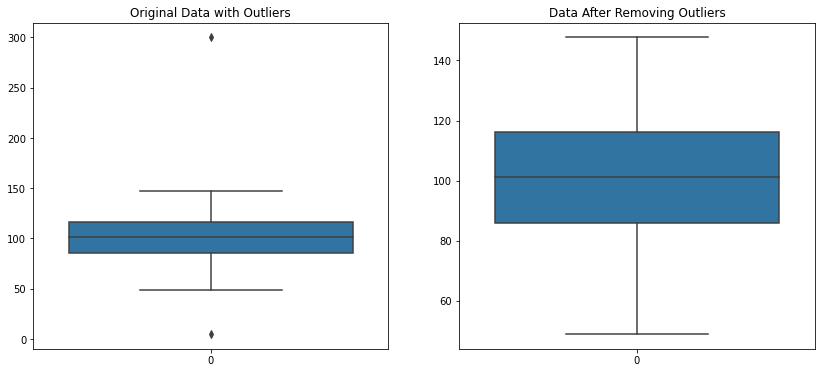

In [5]:
# Generating a dataset with potential outliers
np.random.seed(0)
data = np.random.normal(100, 20, 200)
data = np.append(data, [300, 5])  # Adding potential outliers

# Calculating IQR
Q1 = np.percentile(data, 25)
Q3 = np.percentile(data, 75)
IQR = Q3 - Q1

# Defining the outlier criteria (1.5 times the IQR)
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifying outliers
outliers = (data < lower_bound) | (data > upper_bound)

# Removing outliers
data_no_outliers = data[~outliers]

# Plotting the original data with outliers
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=data)
plt.title('Original Data with Outliers')

# Plotting the data after removing outliers
plt.subplot(1, 2, 2)
sns.boxplot(data=data_no_outliers)
plt.title('Data After Removing Outliers')

plt.show()

* Original Data with Outliers - (Left Box Plot): This plot shows the original dataset, including potential outliers. Notice the points that are significantly above or below the rest of the data, depicted as individual points outside the whiskers of the box plot.

* Data After Removing Outliers - (Right Box Plot): After applying the IQR criteria to identify and remove outliers, the dataset appears more uniform, and the extreme values are no longer present. The range of the data is now more representative of the majority of the dataset.